## Business Problem

To create a visualisation that allows users to look at the return characteristics of multiple assets at the same time

In [ ]:
# import basic libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#import excel file of asset returns from yahoo

df = pd.read_excel('/content/drive/MyDrive/prices.xlsx', index_col='Date', parse_dates=['Date'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33582 entries, 1999-12-31 to 2022-03-29
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  33582 non-null  object 
 1   AAPL     33582 non-null  float64
 2   AGG      27948 non-null  float64
 3   AMD      33582 non-null  float64
 4   AMZN     33582 non-null  float64
 5   BABA     11370 non-null  float64
 6   EFA      31080 non-null  float64
 7   EMB      21564 non-null  float64
 8   FB       14892 non-null  float64
 9   GLD      26220 non-null  float64
 10  GOOG     26604 non-null  float64
 11  GOVT     15246 non-null  float64
 12  HYG      22620 non-null  float64
 13  LQD      29712 non-null  float64
 14  MSFT     33582 non-null  float64
 15  NVDA     33582 non-null  float64
 16  QQQ      33582 non-null  float64
 17  SPY      33582 non-null  float64
 18  TSLA     17754 non-null  float64
 19  ^GSPC    33582 non-null  float64
 20  ^RUA     33408 non-null  float64


(33582, 21)

In [ ]:
# import the ETF returns form yahoo. 
df_hedge = pd.read_csv('/content/drive/MyDrive/hedge_fund_raw.csv', sep=';', parse_dates = ['date'], index_col=['date'])

# Select the columns which have object as data type
hedge_cols = df_hedge.select_dtypes(include=[object]).columns

#replace the % so that data can be turned into float
new_hedge=df_hedge.replace('%', '', regex=True)
new_hedge = new_hedge.astype(float)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1997-01-31 to 2020-08-31
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Convertible Arbitrage   284 non-null    object
 1   CTA Global              284 non-null    object
 2   Distressed Securities   284 non-null    object
 3   Emerging Markets        284 non-null    object
 4   Equity Market Neutral   284 non-null    object
 5   Event Driven            284 non-null    object
 6   Fixed Income Arbitrage  284 non-null    object
 7   Global Macro            284 non-null    object
 8   Long/Short Equity       284 non-null    object
 9   Merger Arbitrage        284 non-null    object
 10  Relative Value          284 non-null    object
 11  Short Selling           282 non-null    object
 12  Funds Of Funds          284 non-null    object
dtypes: object(13)
memory usage: 31.1+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2

(284, 13)

In [ ]:
# getting a dataframe with the adjusted close
df_adj_close = df[df['Feature']=='Adj Close']

In [ ]:
print(df_adj_close.head(5))

              Feature      AAPL  AGG       AMD     AMZN  BABA  EFA  EMB  FB  \
Date                                                                          
1999-12-31  Adj Close  0.786033  NaN  14.46875  76.1250   NaN  NaN  NaN NaN   
2000-01-03  Adj Close  0.855797  NaN  15.50000  89.3750   NaN  NaN  NaN NaN   
2000-01-04  Adj Close  0.783644  NaN  14.62500  81.9375   NaN  NaN  NaN NaN   
2000-01-05  Adj Close  0.795112  NaN  15.00000  69.7500   NaN  NaN  NaN NaN   
2000-01-06  Adj Close  0.726304  NaN  16.00000  65.5625   NaN  NaN  NaN NaN   

            GLD  ...  GOVT  HYG  LQD       MSFT      NVDA        QQQ  \
Date             ...                                                   
1999-12-31  NaN  ...   NaN  NaN  NaN  36.886776  0.898186  79.050415   
2000-01-03  NaN  ...   NaN  NaN  NaN  36.827534  0.895793  81.970200   
2000-01-04  NaN  ...   NaN  NaN  NaN  35.583481  0.871874  76.346901   
2000-01-05  NaN  ...   NaN  NaN  NaN  35.958672  0.843170  74.400360   
2000-01-06  Na

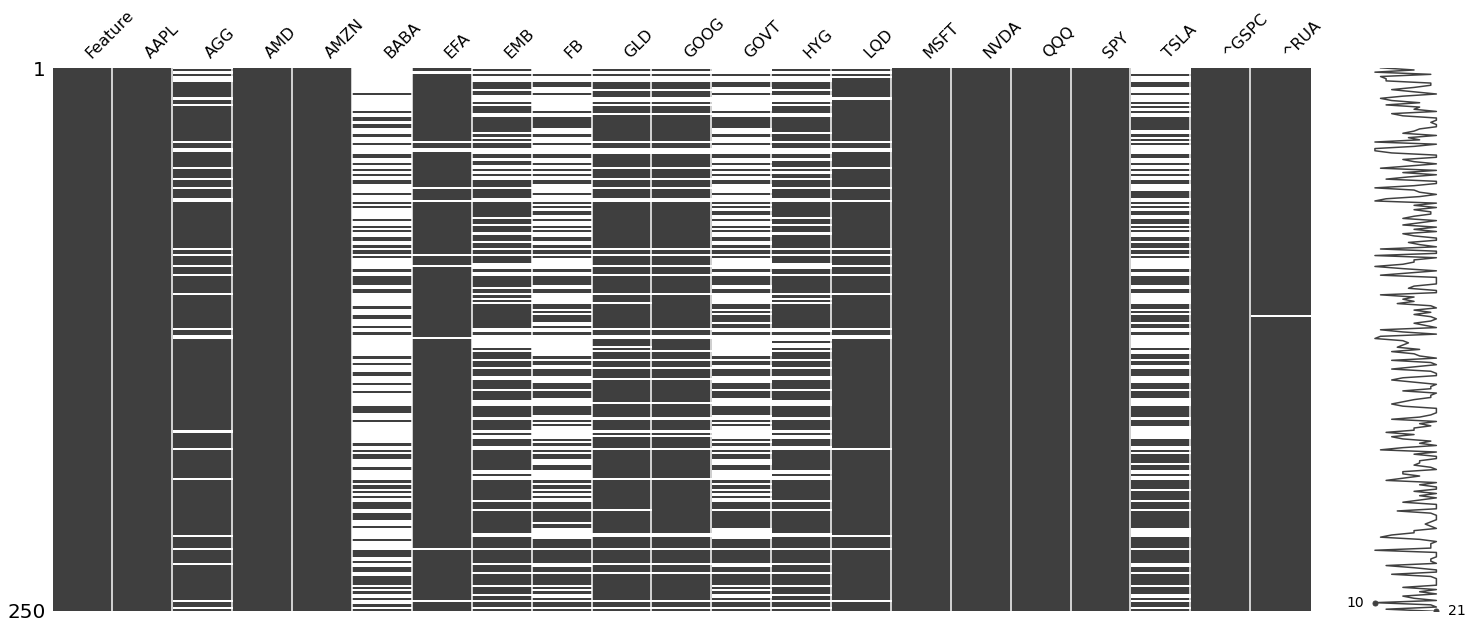

In [ ]:
# Looking for missing data

%matplotlib inline
msno.matrix(df_adj_close.sample(250)) #AGG, BBA, EFA, EMB, FB, GLD, GOOG, Govt, HYG, LQD TSLA has alot of nas.

In [ ]:
# looking for columns with nulls in them
columns_na = df_adj_close.columns[df_adj_close.isna().any()]
print(columns_na)

Index(['AGG', 'BABA', 'EFA', 'EMB', 'FB', 'GLD', 'GOOG', 'GOVT', 'HYG', 'LQD',
       'TSLA', '^RUA'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Feature    0
AAPL       0
AGG        0
AMD        0
AMZN       0
BABA       0
EFA        0
EMB        0
FB         0
GLD        0
GOOG       0
GOVT       0
HYG        0
LQD        0
MSFT       0
NVDA       0
QQQ        0
SPY        0
TSLA       0
^GSPC      0
^RUA       0
dtype: int64
(5597, 21)


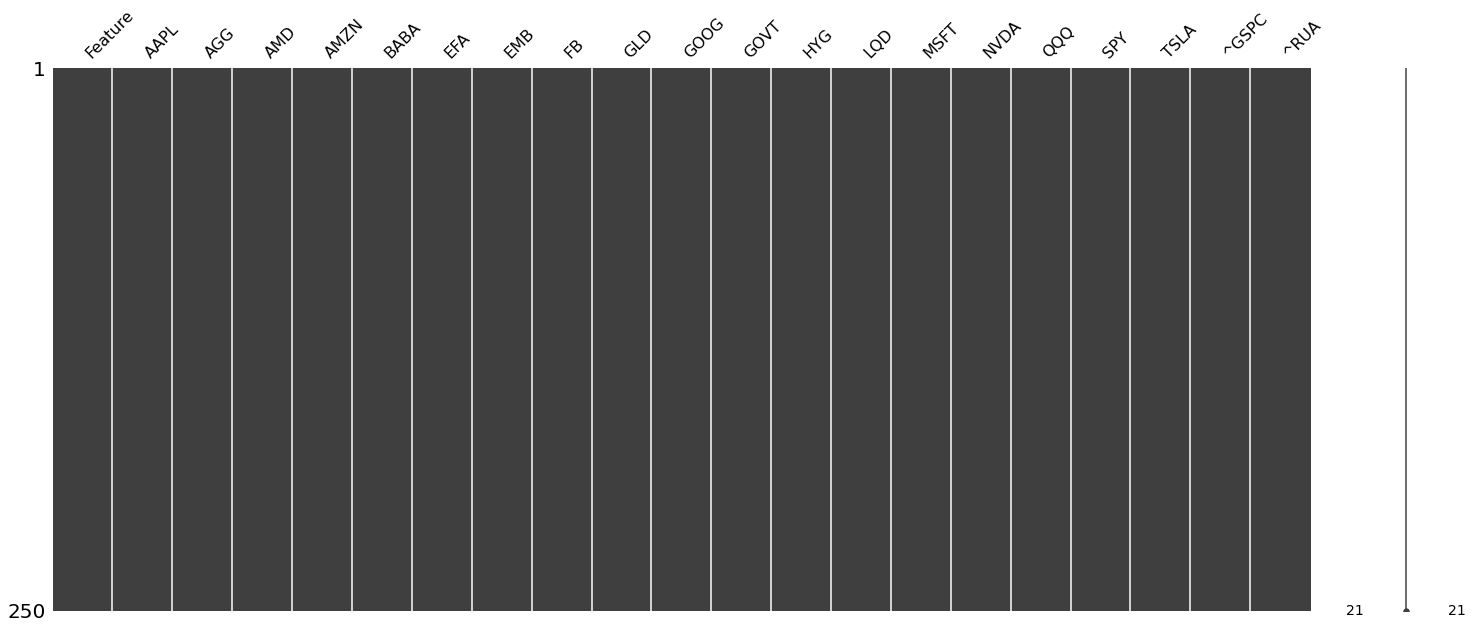

In [ ]:
#using backfill to fill the nulls
df_adj_close.fillna(method='bfill',inplace=True)
print(df_adj_close.isnull().sum())
msno.matrix(df_adj_close.sample(250))
print(df_adj_close.shape)


In [ ]:
print(df_adj_close.head(5))

              Feature      AAPL        AGG       AMD     AMZN       BABA  \
Date                                                                       
1999-12-31  Adj Close  0.786033  57.101986  14.46875  76.1250  93.889999   
2000-01-03  Adj Close  0.855797  57.101986  15.50000  89.3750  93.889999   
2000-01-04  Adj Close  0.783644  57.101986  14.62500  81.9375  93.889999   
2000-01-05  Adj Close  0.795112  57.101986  15.00000  69.7500  93.889999   
2000-01-06  Adj Close  0.726304  57.101986  16.00000  65.5625  93.889999   

                  EFA       EMB     FB        GLD  ...       GOVT        HYG  \
Date                                               ...                         
1999-12-31  25.094837  51.34687  38.23  44.380001  ...  21.574419  40.524853   
2000-01-03  25.094837  51.34687  38.23  44.380001  ...  21.574419  40.524853   
2000-01-04  25.094837  51.34687  38.23  44.380001  ...  21.574419  40.524853   
2000-01-05  25.094837  51.34687  38.23  44.380001  ...  21.574419  

In [ ]:
stock_col = df_adj_close.select_dtypes(include=[float]).columns

print(stock_col)

Index(['AAPL', 'AGG', 'AMD', 'AMZN', 'BABA', 'EFA', 'EMB', 'FB', 'GLD', 'GOOG',
       'GOVT', 'HYG', 'LQD', 'MSFT', 'NVDA', 'QQQ', 'SPY', 'TSLA', '^GSPC',
       '^RUA'],
      dtype='object')


In [ ]:
# resample the returns to look at monthly pct change
monthly_price= df_adj_close[stock_col].resample('1m', label ='right').last()
monthly_ret = monthly_price.pct_change()*100
monthly_ret.dropna(inplace=True)
monthly_ret.shape

(267, 20)

In [ ]:
#merge both data sets to see all the monthly returns in one table
merged_df = pd.merge(monthly_ret, new_hedge, left_index=True, right_index=True)
print(merged_df.head(5))


                 AAPL  AGG        AMD       AMZN  BABA  EFA  EMB   FB  GLD  \
2000-01-31   0.911783  0.0  24.406048 -15.188834   0.0  0.0  0.0  0.0  0.0   
2000-02-29  10.482027  0.0   9.722222   6.679574   0.0  0.0  0.0  0.0  0.0   
2000-03-31  18.484168  0.0  49.367089  -2.722323   0.0  0.0  0.0  0.0  0.0   
2000-04-30  -8.651683  0.0  48.305085 -17.630597   0.0  0.0  0.0  0.0  0.0   
2000-05-31 -32.292169  0.0  -6.571429 -12.457531   0.0  0.0  0.0  0.0  0.0   

            GOOG  ...  Emerging Markets  Equity Market Neutral  Event Driven  \
2000-01-31   0.0  ...              0.77                   0.75          0.88   
2000-02-29   0.0  ...              5.28                   2.53          3.46   
2000-03-31   0.0  ...              3.18                   1.34          0.69   
2000-04-30   0.0  ...             -5.41                   1.68         -0.59   
2000-05-31   0.0  ...             -4.33                   0.62         -0.34   

            Fixed Income Arbitrage  Global Macro  

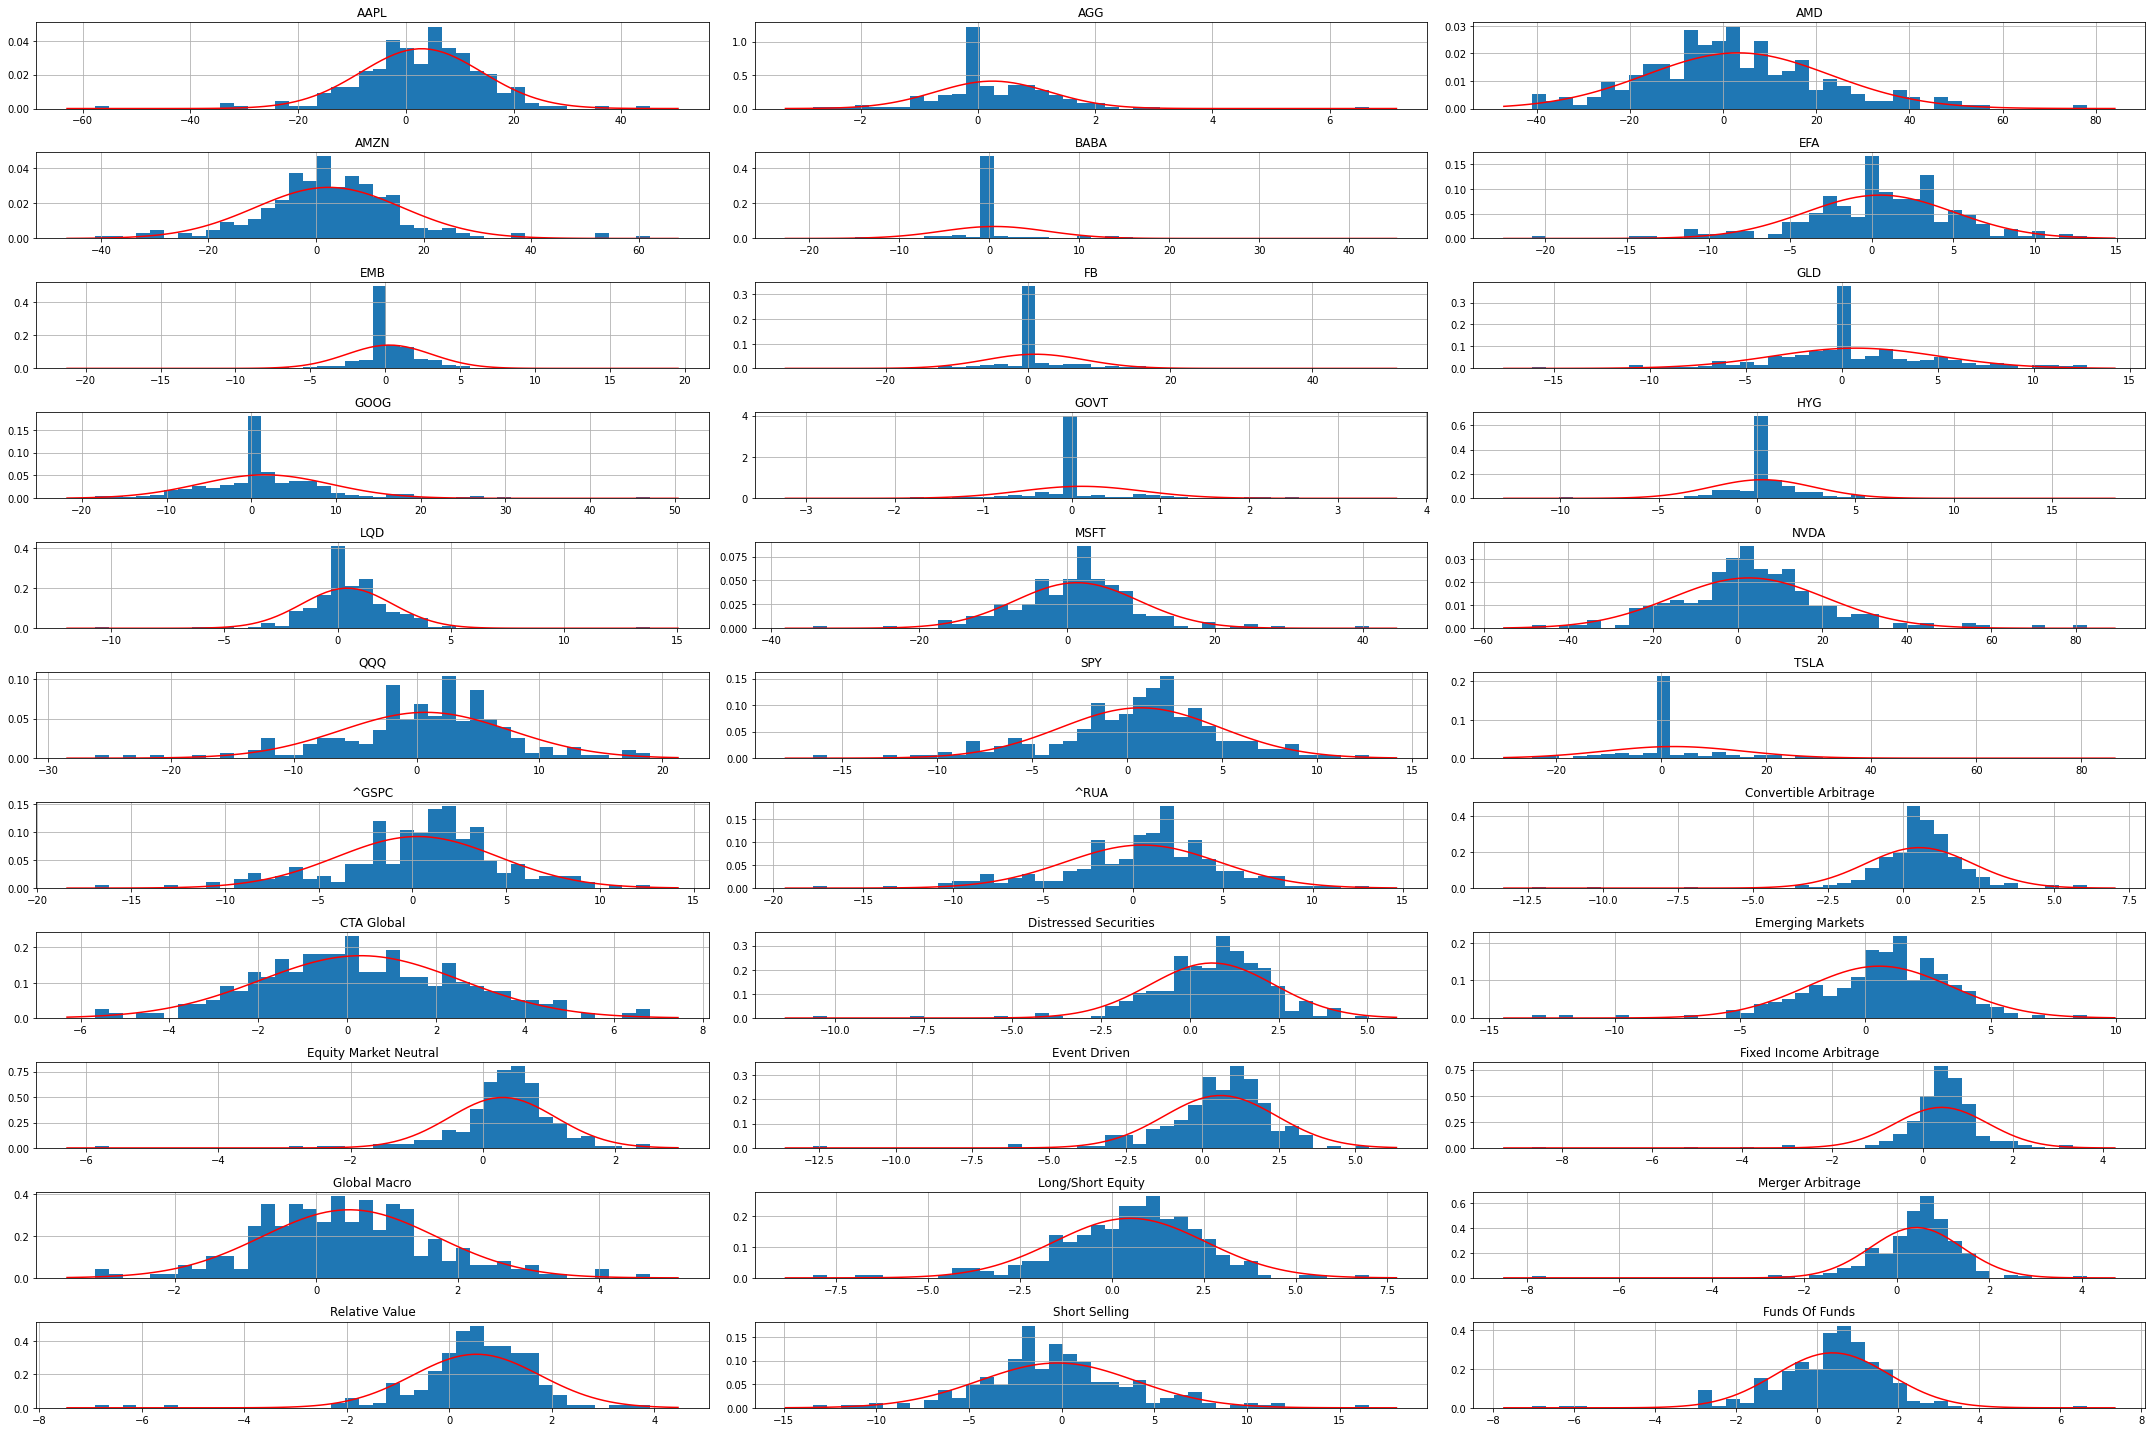

In [ ]:
# to look at all the asset returns v.s normal distribution across all the tickers
from scipy.stats import norm

fig, axs = plt.subplots(11,3, figsize=(30, 20), sharex=False, sharey=False)
row_i = 11
col_j = 3
for i in range(row_i):
  for j in range(col_j):
    merged_df[stock_col[arr1[i,j]]].hist(bins=40, ax=axs[i, j], density = True)
    axs[i,j].set_title(stock_col[arr1[i,j]])
    normal = np.random.normal(np.mean(merged_df[stock_col[arr1[i,j]]]), np.std(merged_df[stock_col[arr1[i,j]]]), size = 1000)
    mu, std = norm.fit(normal)
    xx = np.linspace(*axs[i,j].get_xlim(),100)
    axs[i,j].plot(xx, norm.pdf(xx, mu, std), 'r-')
  
  #mu, std = stats.norm.fit(normal)
  #xx = np.linspace(ax.get_xlim(),100)
  #ax.plot(xx, stats.norm.pdf(xx, mu, std), 'r-')
plt.tight_layout()  
plt.show()



In [ ]:
average_return = merged_df.groupby(['Year'])[stock_col].mean()
average_return_by_year = average_return.T
average_return_by_year.shape
average_return_by_year.loc[:20,22]= 'Stock'
average_return_by_year.loc[21:,22]= 'HedgeFund'
average_return_by_year.rename(columns={22:'Type'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [ ]:
average_std = merged_df.groupby(['Year'])[stock_col].std()
average_std_by_year = average_std.T
average_std_by_year.shape
average_std_by_year.loc[:20,22]= 'Stock'
average_std_by_year.loc[21:,22]= 'HedgeFund'
average_std_by_year.rename(columns={22:'Type'},inplace=True)
print(average_std_by_year.head(5))

Year       2000       2001       2002       2003       2004       2005  \
AAPL  24.026057  20.640554  10.811218   9.690140  11.980876  11.034164   
AGG    0.000000   0.000000   0.000000   0.441715   1.167365   1.002751   
AMD   26.943164  33.704041  23.448672  21.868842  14.753548  14.819999   
AMZN  19.635510  31.946664  15.044164   8.617470  13.619193  15.125401   
BABA   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

Year       2006       2007       2008       2009  ...       2012       2013  \
AAPL  10.938728   8.430146  16.573696   6.407094  ...   8.821586   8.337729   
AGG    0.801537   0.853557   2.419952   1.214379  ...   0.584146   0.995484   
AMD   17.878749  11.166775  23.137755  22.917382  ...  17.996368  14.904697   
AMZN  13.478341  16.038715  14.675570   9.288418  ...   8.252632   6.615567   
BABA   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   

Year      2014       2015       2016       2017       2018       2019  \
AAPL  6

In [ ]:
arr2 = np.arange(2000,2021,1)
arr2 = arr2.reshape(7,3)

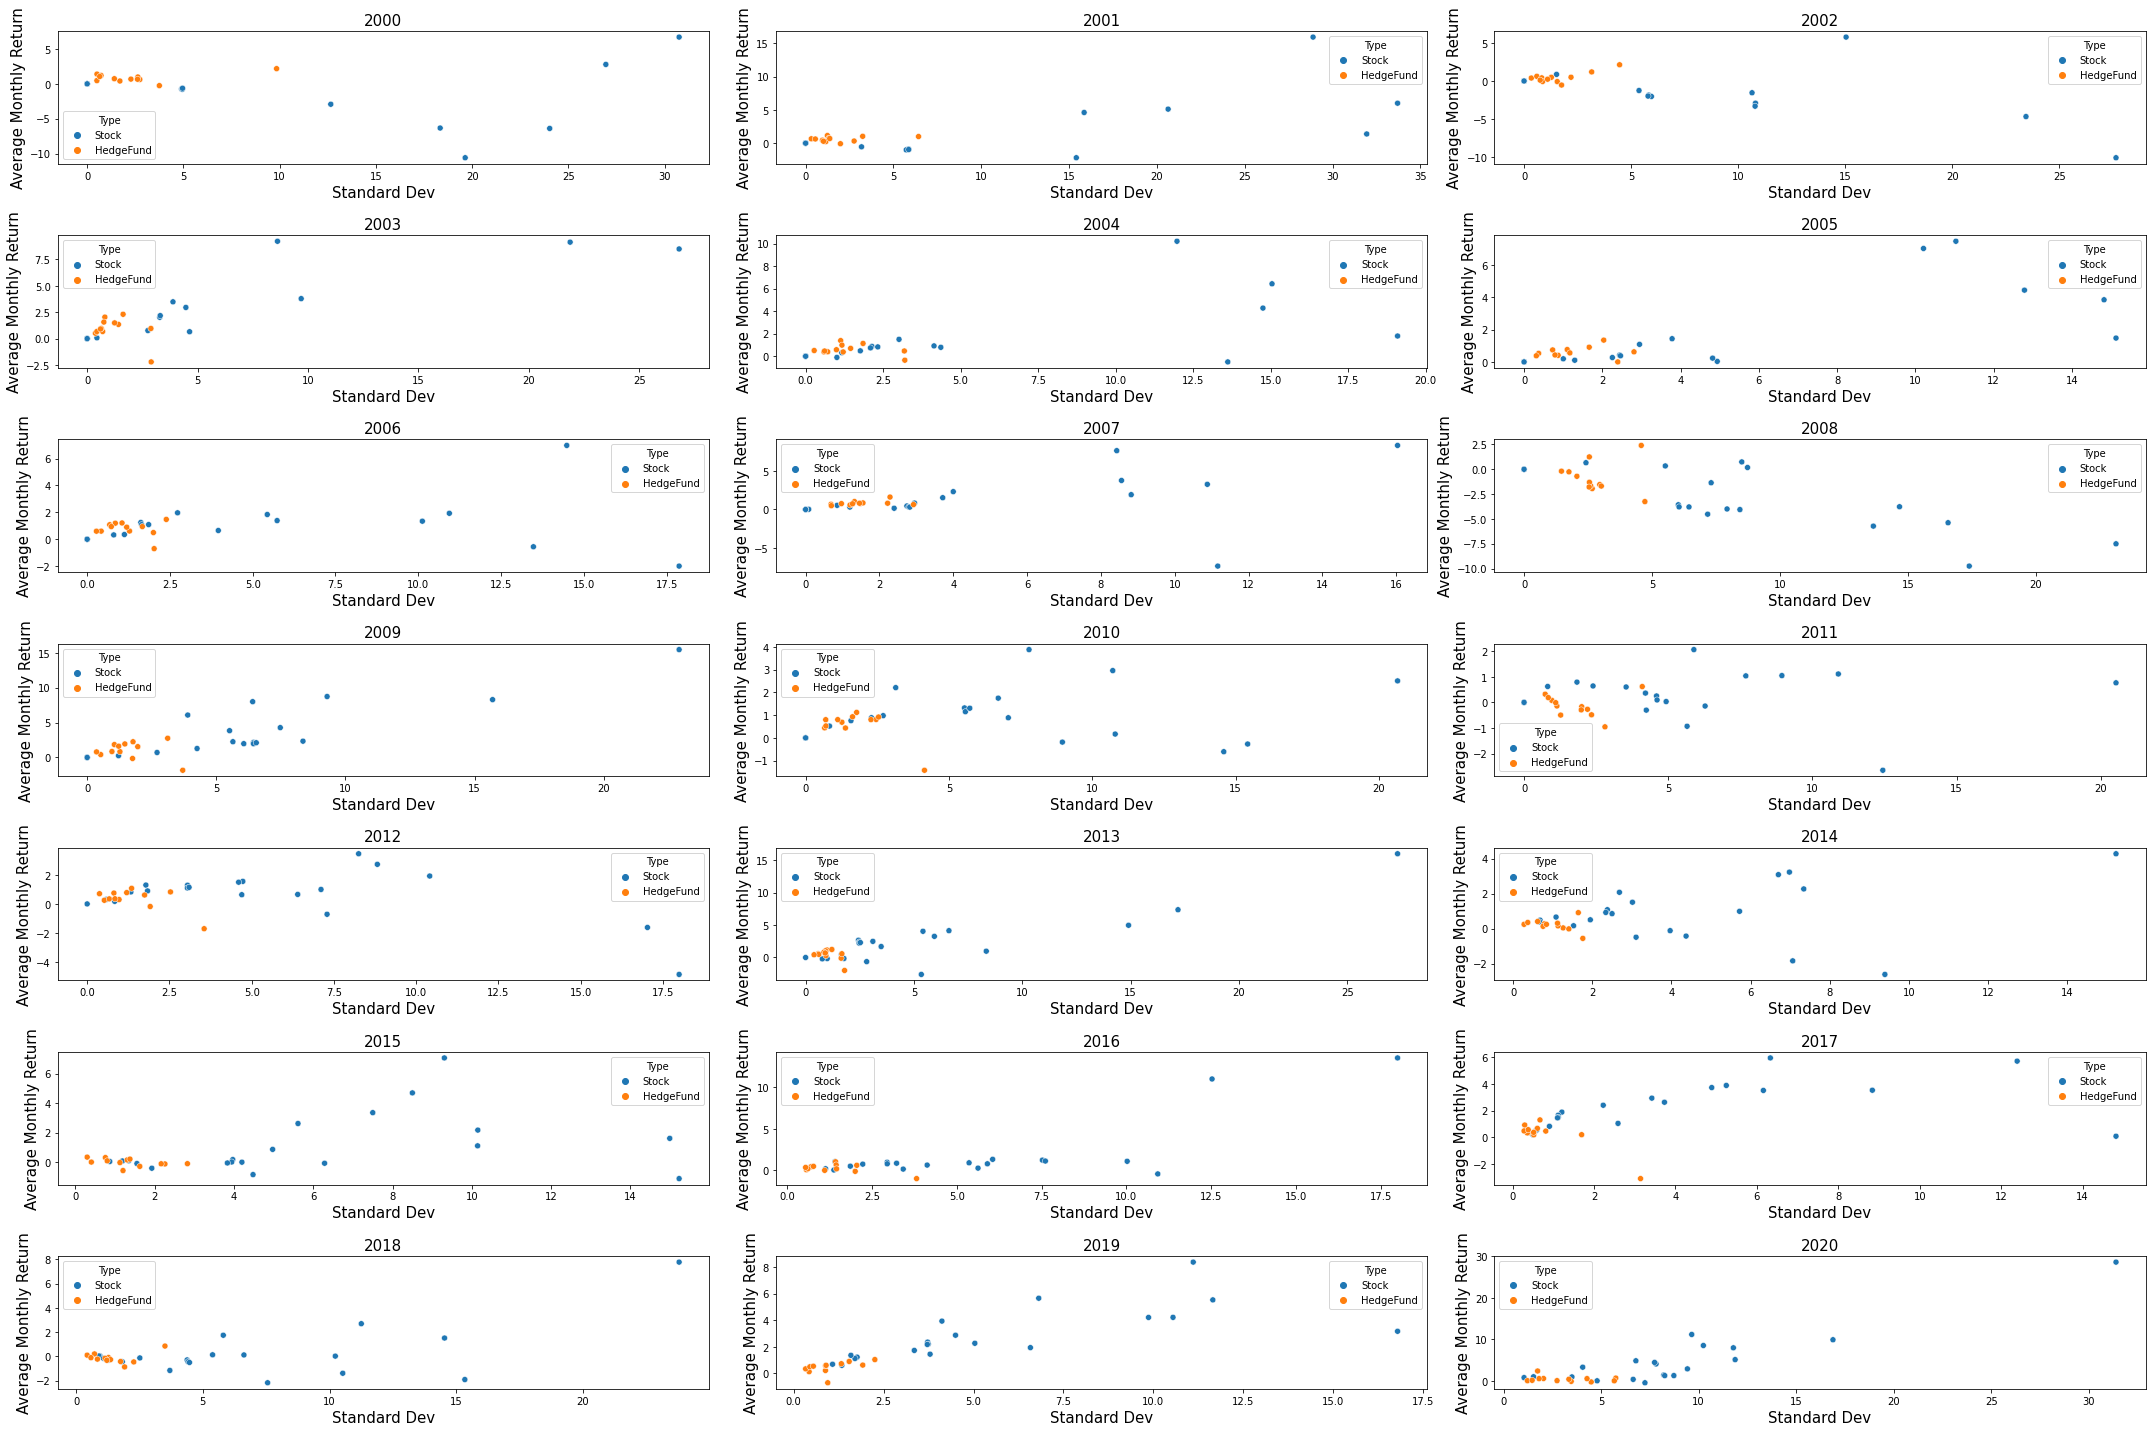

In [ ]:
# to look at the monthly return of assets v.s the standard deviation which is the basis of risk adjusted returns

fig, axs = plt.subplots(7,3, figsize=(30, 20), sharex=False, sharey=False)
row_i = 7
col_j = 3
for i in range(row_i):
  for j in range(col_j):
    sns.scatterplot(x=average_std_by_year[arr2[i,j]], y =average_return_by_year[arr2[i,j]], hue=average_std_by_year['Type'] , ax = axs[i,j])
    axs[i,j].set_title(arr2[i,j], fontsize=15)
    axs[i,j].set_xlabel("Standard Dev", fontsize = 15)
    axs[i,j].set_ylabel("Average Monthly Return", fontsize = 15)
     
  #mu, std = stats.norm.fit(normal)
  #xx = np.linspace(ax.get_xlim(),100)
  #ax.plot(xx, stats.norm.pdf(xx, mu, std), 'r-')
plt.tight_layout()  
plt.show()

Text(0.5, 1.0, '2010')

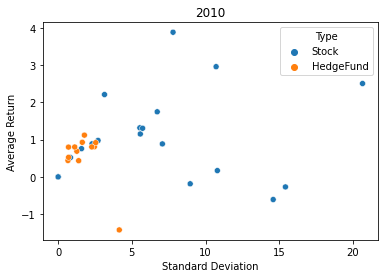

In [ ]:

sns.scatterplot(x=average_std_by_year[2010], y =average_return_by_year[2010], hue=average_std_by_year['Type'] )
plt.xlabel("Standard Deviation")
plt.ylabel("Monthly Average Return")
plt.title(2010)

In [ ]:

print(average_return_by_year.head(5))

Year      2000      2001      2002      2003      2004      2005      2006  \
AAPL -0.063914  0.051242 -0.029049  0.037866  0.102006  0.074729  0.019306   
AGG   0.000000  0.000000  0.000000  0.000748  0.003163  0.001914  0.003220   
AMD   0.027786  0.060178 -0.046622  0.091369  0.042728  0.038476 -0.019972   
AMZN -0.105908  0.013842  0.057492  0.092220 -0.005026  0.014761 -0.005607   
BABA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Year      2007      2008      2009  ...      2012      2013      2014  \
AAPL  0.076163 -0.053801  0.079934  ...  0.027222  0.009726  0.030896   
AGG   0.005370  0.006618  0.002509  ...  0.003092 -0.001618  0.004888   
AMD  -0.073281 -0.075038  0.154561  ... -0.048461  0.049635 -0.026151   
AMZN  0.082954 -0.037728  0.087311  ...  0.034476  0.041307 -0.018396   
BABA  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.009945   

Year      2015      2016      2017      2018      2019      2020   Type  
AAPL -0.000736  0.